In [2]:
import os
import numpy as np
import asdf
import json

from glob import glob


# JWST pipeline-related modules
from jwst.datamodels import dqflags

# The entire jwst pipeline
from jwst.pipeline import calwebb_detector1
from jwst.pipeline import calwebb_image2
from jwst.pipeline import calwebb_image3
from jwst import datamodels

# importing an individual pipeline step
from jwst.skymatch import SkyMatchStep

# Custom scripts for use later

import matplotlib.pyplot as plt
from matplotlib import rcParams

# Use this version for non-interactive plots (easier scrolling of the notebook)
#%matplotlib inline

# Use this version if you want interactive plots
#%matplotlib notebook

from astropy.io import fits

%matplotlib inline

# These gymnastics are needed to make the sizes of the figures
# be the same in both the inline and notebook versions
#%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

# You may want to change the following configurations to customize 
# figure sizes and resolutions
rcParams['figure.figsize'] = [11,8]
rcParams['figure.dpi'] = 80
rcParams['savefig.dpi'] = 80

from jwst.associations.asn_from_list import asn_from_list
from jwst.associations.lib.rules_level3_base import DMS_Level3_Base


In [1]:
os.environ['CRDS_PATH'] = '/Volumes/T7-RED/crds_cache/' 
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'


In [3]:
import jwst
print(jwst.__version__)

1.7.0


In [4]:
try:
    print(os.environ['CRDS_PATH'])
except KeyError:
    print('CRDS_PATH environment variable not set!')
    
try:
    print(os.environ['CRDS_SERVER_URL'])
except KeyError:
    print('CRDS_SERVER_URL environment variable not set!')

try:
    print(os.environ['CRDS_CONTEXT'])
except KeyError:
    print('CRDS_CONTEXT environment variable not set!')

/Volumes/T7-RED/crds_cache/
https://jwst-crds.stsci.edu
CRDS_CONTEXT environment variable not set!


In [5]:
file_id = 'F090W'

proposalID = '2736'

output_dir = file_id+'-calibrated'

print(output_dir)

os.system('mkdir -p {}'.format(output_dir))

F090W-calibrated


0

# Stage1


In [8]:
#download the .py files from https://github.com/chriswillott/jwst
import checkifstar
from dosnowballflags import snowballflags


In [6]:
uncal_file = glob('JWST/*/*uncal.fits')
uncal_file

['JWST/jw01837014001_02201_00001_nrca1/jw01837014001_02201_00001_nrca1_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrca2/jw01837014001_02201_00001_nrca2_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrca3/jw01837014001_02201_00001_nrca3_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrca4/jw01837014001_02201_00001_nrca4_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrcb1/jw01837014001_02201_00001_nrcb1_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrcb2/jw01837014001_02201_00001_nrcb2_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrcb3/jw01837014001_02201_00001_nrcb3_uncal.fits',
 'JWST/jw01837014001_02201_00001_nrcb4/jw01837014001_02201_00001_nrcb4_uncal.fits',
 'JWST/jw01837014001_02201_00002_nrca1/jw01837014001_02201_00002_nrca1_uncal.fits',
 'JWST/jw01837014001_02201_00002_nrca2/jw01837014001_02201_00002_nrca2_uncal.fits',
 'JWST/jw01837014001_02201_00002_nrca3/jw01837014001_02201_00002_nrca3_uncal.fits',
 'JWST/jw01837014001_02201_00002_nrca4/jw01837014001_02201_00002_nrca4_uncal

In [31]:
uncal_file = glob('JWST/*/*uncal.fits')
uncal_file

for uncal in uncal_file:

# save the jump.fits

    detector1 = calwebb_detector1.Detector1Pipeline()
    detector1.output_dir = '/'.join(uncal.split('/')[0:-1])
    detector1.save_results = True

    detector1.ipc.skip = True

    detector1.jump.save_results = True

    detector1.ramp_fit.skip = True
    detector1.gain_scale.skip = True
    
    run_output = detector1.run(uncal)

# snowball flag to the jump.fits

    jumpdirfile = uncal.replace('uncal','jump')
    imagingmode = True
    filtername = fits.getheader(uncal)['FILTER']
    npixfind = 50
    satpixradius=3
    halofactorradius=2

    snowballflags(jumpdirfile,filtername,npixfind,satpixradius,halofactorradius,imagingmode)

# run the last two step of the pipeline from jump.fits, and save the rate.fits
    detector1 = calwebb_detector1.Detector1Pipeline()
    detector1.output_dir = output_dir
    detector1.save_results = True

    detector1.group_scale.skip = True
    detector1.dq_init.skip = True
    detector1.saturation.skip = True
    detector1.ipc.skip = True
    detector1.superbias.skip = True
    detector1.refpix.skip = True
    detector1.rscd.skip = True
    detector1.firstframe.skip = True
    detector1.lastframe.skip = True
    detector1.linearity.skip = True
    detector1.dark_current.skip = True
    detector1.reset.skip = True
    detector1.persistence.skip = True
    detector1.jump.skip = True

    detector1.ramp_fit.skip = False
    detector1.gain_scale.skip = False

    run_output = detector1.run(jumpdirfile)

#    break




2022-09-29 11:03:22,241 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 11:03:22,243 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 11:03:22,244 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 11:03:22,246 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 11:03:22,247 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 11:03:22,249 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 11:03:22,250 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 11:03:22,252 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 11:03:22,253 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 11:03:22,255 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 11:04:20,217 - stpipe - WARNING - /Volumes/T7-RED/PRIMER/F090W/o014/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 11:04:20,218 - stpipe - WARNING - /Volumes/T7-RED/PRIMER/F090W/o014/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 11:04:20,220 - stpipe - WARNING - /Volumes/T7-RED/PRIMER/F090W/o014/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 11:04:20,221 - stpipe - WARNING - /Volumes/T7-RED/PRIMER/F090W/o014/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notspikes_mean > spikeratio:

2022-09-29 11:04:20,222 - stpipe - WARNING - /Volumes/T7-RED/PRIMER/F090W/o014/checkifstar.py:71: RuntimeWarning: invalid value encountered in double_scalars
  if spikes_mean/notsp

Running makewebbpsfmask nircam F090W 0.033 74 18 32
./temppsfmask_nircam_F090W_0p033_74.fits ./WebbPSF_nircam_F090W_0p033_74.fits


2022-09-29 11:06:17,808 - stpipe.Detector1Pipeline - INFO - Detector1Pipeline instance created.
2022-09-29 11:06:17,809 - stpipe.Detector1Pipeline.group_scale - INFO - GroupScaleStep instance created.
2022-09-29 11:06:17,811 - stpipe.Detector1Pipeline.dq_init - INFO - DQInitStep instance created.
2022-09-29 11:06:17,812 - stpipe.Detector1Pipeline.saturation - INFO - SaturationStep instance created.
2022-09-29 11:06:17,813 - stpipe.Detector1Pipeline.ipc - INFO - IPCStep instance created.
2022-09-29 11:06:17,815 - stpipe.Detector1Pipeline.superbias - INFO - SuperBiasStep instance created.
2022-09-29 11:06:17,817 - stpipe.Detector1Pipeline.refpix - INFO - RefPixStep instance created.
2022-09-29 11:06:17,818 - stpipe.Detector1Pipeline.rscd - INFO - RscdStep instance created.
2022-09-29 11:06:17,820 - stpipe.Detector1Pipeline.firstframe - INFO - FirstFrameStep instance created.
2022-09-29 11:06:17,821 - stpipe.Detector1Pipeline.lastframe - INFO - LastFrameStep instance created.
2022-09-29 1

# Stage2


In [7]:
rates_file = glob(file_id+'-calibrated/*rate.fits')
rates_file

['F090W-calibrated/jw02736001001_02101_00001_nrca1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca4_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb4_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca4_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb1_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb2_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb3_rate.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb4_rate

In [8]:
rates_file = glob(file_id+'-calibrated/*rate.fits')

for rate in rates_file:
    # Create an instance of the pipeline class
    image2 = calwebb_image2.Image2Pipeline()

    # Set some parameters that pertain to the
    # entire pipeline
    image2.output_dir = output_dir
    image2.save_results = True
    # turn off the ResampleStep, comment out to produce the 
    # individual rectified *_i2d.fits for quick-look checks
    image2.resample.skip = True

    # Call the run() method
    image2.run(rate)

2022-09-09 14:12:10,022 - stpipe.Image2Pipeline - INFO - Image2Pipeline instance created.
2022-09-09 14:12:10,024 - stpipe.Image2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2022-09-09 14:12:10,027 - stpipe.Image2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2022-09-09 14:12:10,029 - stpipe.Image2Pipeline.flat_field - INFO - FlatFieldStep instance created.
2022-09-09 14:12:10,031 - stpipe.Image2Pipeline.photom - INFO - PhotomStep instance created.
2022-09-09 14:12:10,033 - stpipe.Image2Pipeline.resample - INFO - ResampleStep instance created.
2022-09-09 14:12:10,284 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline running with args ('F090W-calibrated/jw02736001001_02101_00001_nrca1_rate.fits',).
2022-09-09 14:12:10,290 - stpipe.Image2Pipeline - INFO - Step Image2Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'F090W-calibrated', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': Tru

In [9]:
from plotimages import plot_images
from image1overf import sub1fimaging
from astropy.io import fits

In [10]:
calfiles = glob(output_dir+'/jw*_cal.fits')
calfiles

['F090W-calibrated/jw02736001001_02101_00001_nrca1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrca4_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00001_nrcb4_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrca4_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb1_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb2_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb3_cal.fits',
 'F090W-calibrated/jw02736001001_02101_00002_nrcb4_cal.fits',
 'F090W-

In [11]:
output_dir

'F090W-calibrated'

In [12]:
for cal2file in calfiles:
    cal21overffile = cal2file.replace('_cal.fits','_cal_1overf.fits')
    print ('Running 1/f correction on {} to produce {}'.format(cal2file,cal21overffile))
    with fits.open(cal2file) as cal2hdulist:
        if cal2hdulist['PRIMARY'].header['SUBARRAY']=='FULL' or cal2hdulist['PRIMARY'].header['SUBARRAY']=='SUB256':
            sigma_bgmask=3.0
            sigma_1fmask=2.0
            splitamps=False   #Set to True only in a sparse field so each amplifier will be fit separately. 
            correcteddata = sub1fimaging(cal2hdulist,sigma_bgmask,sigma_1fmask,splitamps)
            if cal2hdulist['PRIMARY'].header['SUBARRAY']=='FULL':
                cal2hdulist['SCI'].data[4:2044,4:2044] = correcteddata  
            elif cal2hdulist['PRIMARY'].header['SUBARRAY']=='SUB256':
                cal2hdulist['SCI'].data[:252,:252] = correcteddata
            cal2hdulist.writeto(cal21overffile, overwrite=True)

Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca1_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca1_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca2_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca2_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca3_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca3_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrca4_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrca4_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrcb1_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrcb1_cal_1overf.fits
Running 1/f correction on F090W-calibrated/jw02736001001_02101_00001_nrcb2_cal.fits to produce F090W-calibrated/jw02736001001_02101_00001_nrcb2_cal_1overf.fits
Running 1/f correction on F090W-calibrat

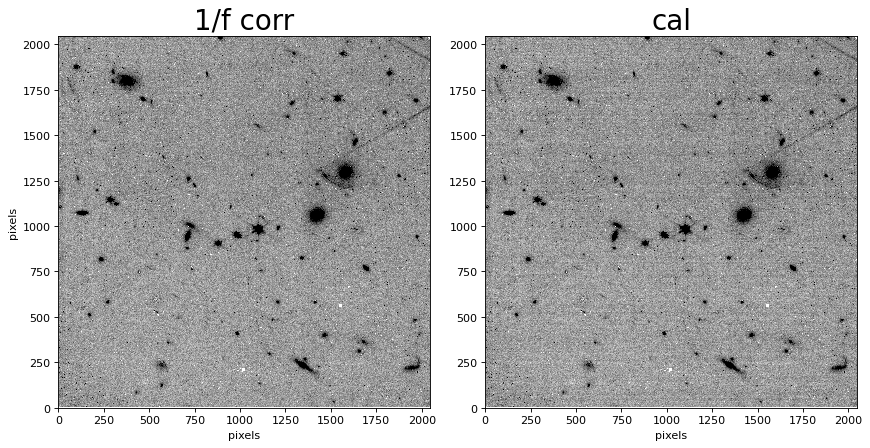

In [13]:
plot_images(cal21overffile,
            cal2file, 
            title1='1/f corr', title2='cal')

In [5]:
'JWST-'+file_id

'JWST-F090W'

# Stage 3

In [6]:
calfiles = glob(output_dir+'/jw*_cal_1overf.fits')
asn = asn_from_list(calfiles,rule=DMS_Level3_Base, product_name='test')
asn

{
    "asn_type": "None",
    "asn_rule": "DMS_Level3_Base",
    "version_id": null,
    "code_version": "1.7.0",
    "degraded_status": "No known degraded exposures in association.",
    "program": "noprogram",
    "constraints": "No constraints",
    "asn_id": "a3001",
    "target": "none",
    "asn_pool": "none",
    "products": [
        {
            "name": "test",
            "members": [
                {
                    "expname": "F090W-calibrated/jw02736001001_02101_00001_nrca1_cal_1overf.fits",
                    "exptype": "science"
                },
                {
                    "expname": "F090W-calibrated/jw02736001001_02101_00001_nrca2_cal_1overf.fits",
                    "exptype": "science"
                },
                {
                    "expname": "F090W-calibrated/jw02736001001_02101_00001_nrca3_cal_1overf.fits",
                    "exptype": "science"
                },
                {
                    "expname": "F090W-calibrated/jw0

In [7]:
json_stage3 = 'JWST-'+file_id+'-stage3.json'
with open(json_stage3, 'w') as outfile:
    name,serialized = asn.dump(format='json') 
    outfile.write(serialized)

In [9]:
image3 = calwebb_image3.Image3Pipeline()

# Set some parameters that pertain to the entire pipeline
image3.output_dir = file_id+'-calibrated/'
image3.output_file = file_id+'_i2d.fits'

image3.save_results = True
# Set some parameters that pertain to some of the individual steps

image3.tweakreg.skip = False 
#image3.tweakreg.backend == 'sextractor'
image3.tweakreg.align_to_gaia == True
# Turn off SkyMatchStep

image3.skymatch.subtract = True
image3.skymatch.skip = False
# Set the ratio of input to output pixels to create an output mosaic 
# on a 0.015"/pixel scale

image3.resample.pixel_scale = 0.03
# Call the run() method

image3.run(json_stage3)


2022-09-14 12:38:31,596 - stpipe.Image3Pipeline - INFO - Image3Pipeline instance created.
2022-09-14 12:38:31,600 - stpipe.Image3Pipeline.assign_mtwcs - INFO - AssignMTWcsStep instance created.
2022-09-14 12:38:31,607 - stpipe.Image3Pipeline.tweakreg - INFO - TweakRegStep instance created.
2022-09-14 12:38:31,611 - stpipe.Image3Pipeline.skymatch - INFO - SkyMatchStep instance created.
2022-09-14 12:38:31,615 - stpipe.Image3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.
2022-09-14 12:38:31,621 - stpipe.Image3Pipeline.resample - INFO - ResampleStep instance created.
2022-09-14 12:38:31,626 - stpipe.Image3Pipeline.source_catalog - INFO - SourceCatalogStep instance created.
2022-09-14 12:38:31,801 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline running with args ('JWST-F090W-stage3.json',).
2022-09-14 12:38:31,837 - stpipe.Image3Pipeline - INFO - Step Image3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': '/Volumes/T7-RED/SMACS072